In [282]:
#import packages 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.options.mode.chained_assignment = None

# Data Preparation 

In [283]:
#import data file & preview data 
df = pd.read_csv('/Users/Amanda.Hartzler/Desktop/Data_Analytics_Masters/D212/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [284]:
#determine column names, non-null values, & data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [285]:
#There are no missing/null values. 

#determine if any rows are duplicated 
print(df.duplicated())
print(df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
0


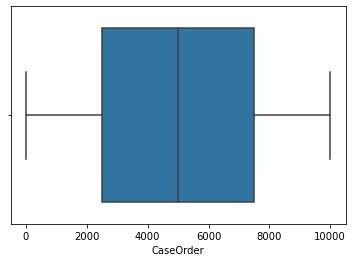

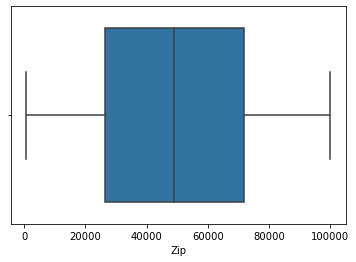

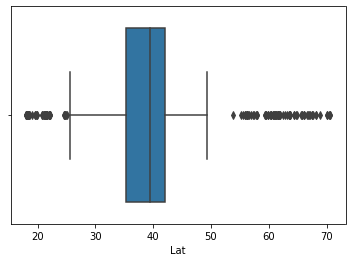

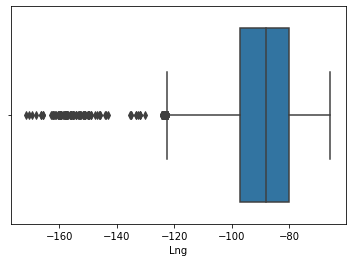

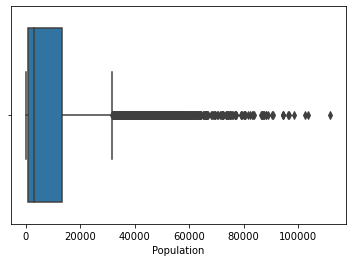

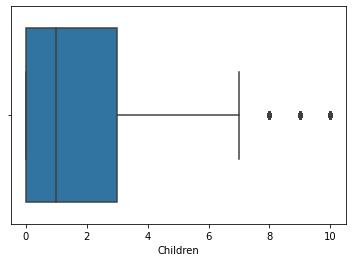

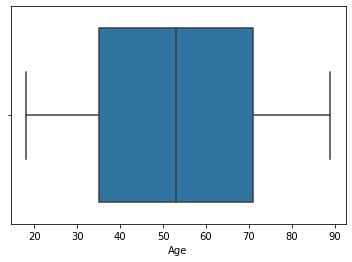

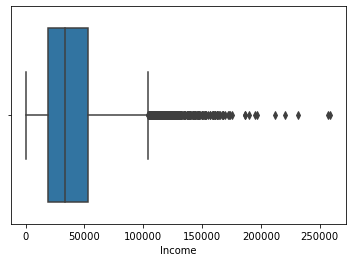

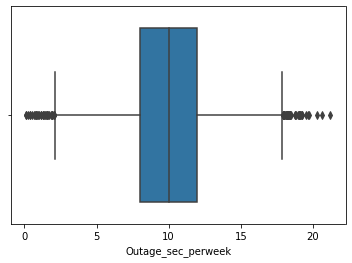

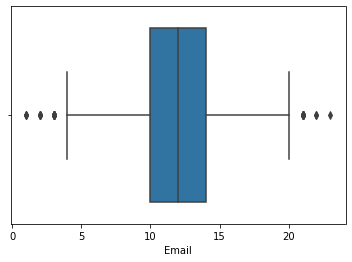

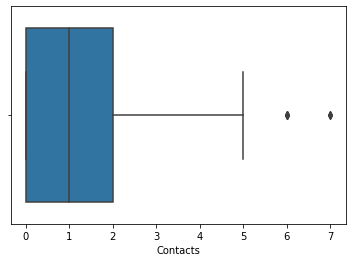

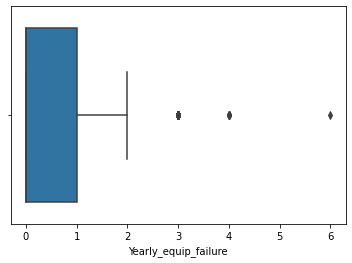

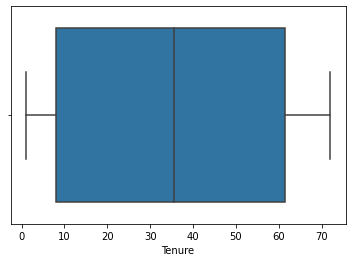

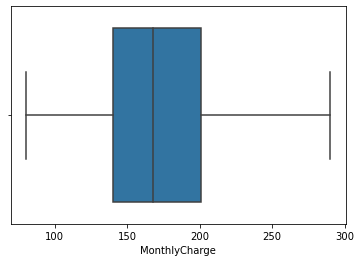

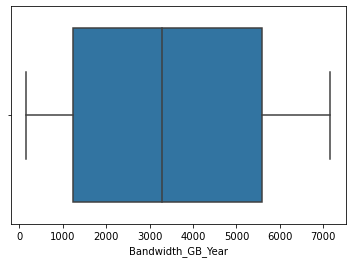

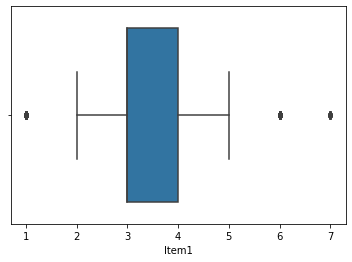

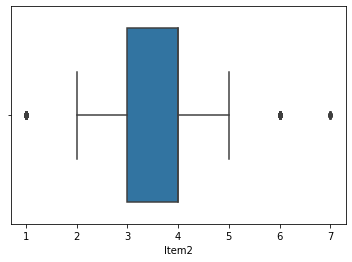

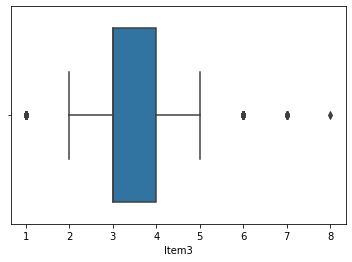

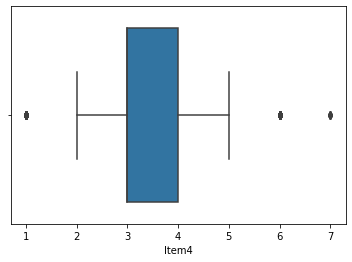

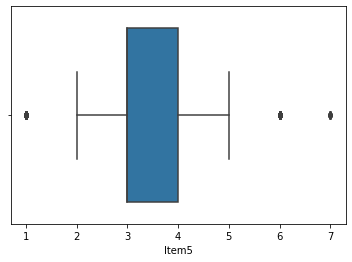

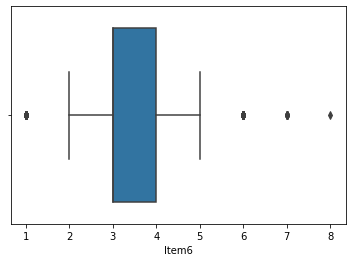

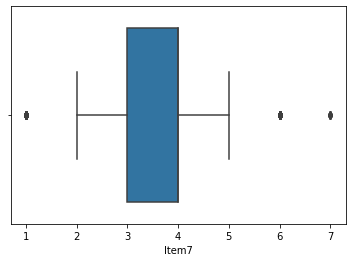

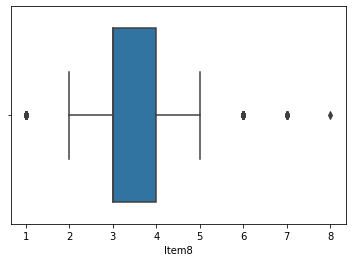

In [286]:
#There are no duplicated values

#Using Boxplots, check for outliers in each in each float or integer value column.
outliers = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

i=0 
while i < len(outliers):
    sns.boxplot(x = outliers[i], data = df)
    plt.show()
    i = i + 1

In [287]:
#Outliers found in Lat, Lng, Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Item1, Item2, Item3, Item4, Item5, Item6, Item7, & Item8 columns. 
#Retain outliers in all variables (all values are within reasonable ranges)

In [288]:
#Descriptive Statistics for all possibly relevant variables
relevant_variables = [df['Lat'], df['Lng'], df['Population'], df['Children'], df['Age'], df['Income'], df['Outage_sec_perweek'], df['Email'], df['Contacts'], df['Yearly_equip_failure'], df['Tenure'], df['MonthlyCharge'], df['Bandwidth_GB_Year']]
rv = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

i=0 
while i < len(relevant_variables):
    print(' ')
    print(str(rv[i]) + ' Descriptive Statistics')
    print(relevant_variables[i]. describe())
    i = i + 1

 
Lat Descriptive Statistics
count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64
 
Lng Descriptive Statistics
count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64
 
Population Descriptive Statistics
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
 
Children Descriptive Statistics
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64
 
Age Descriptive Statistics
count    10000.000000
mean     

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Email'}>],
       [<AxesSubplot:title={'center':'Contacts'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>]], dtype=object)

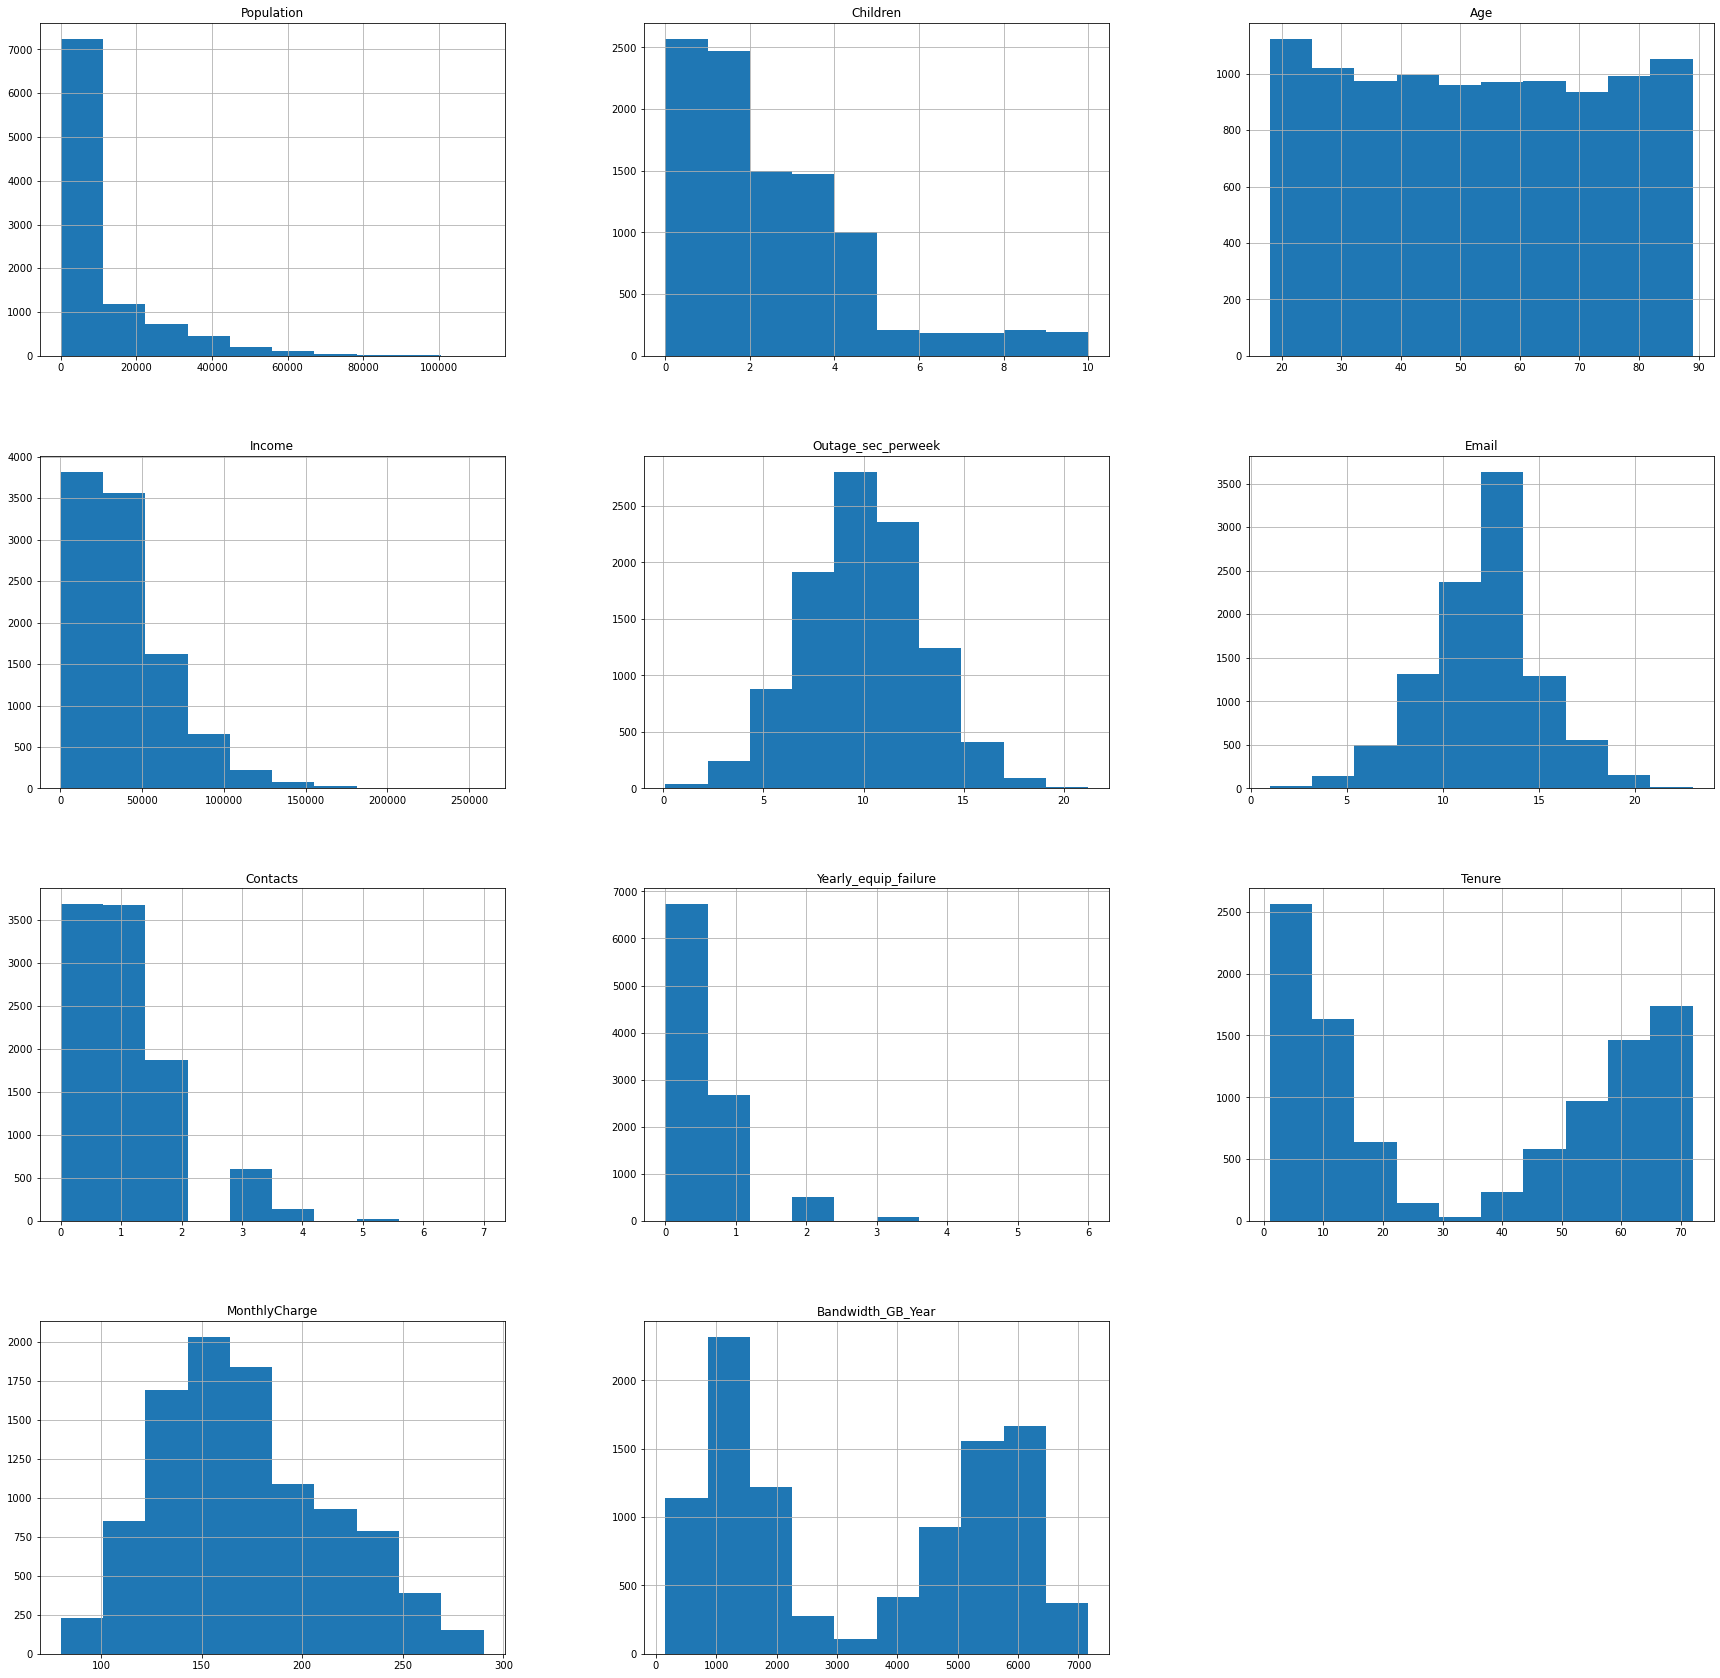

In [289]:
#Visually explore all possibly relevant variables with univariate analysis by creating histograms 
df.hist(column=['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], figsize=(30,30))


In [290]:
#Scale the data
new_df = df[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
df_standardized = (new_df - new_df.mean()) / new_df.std()

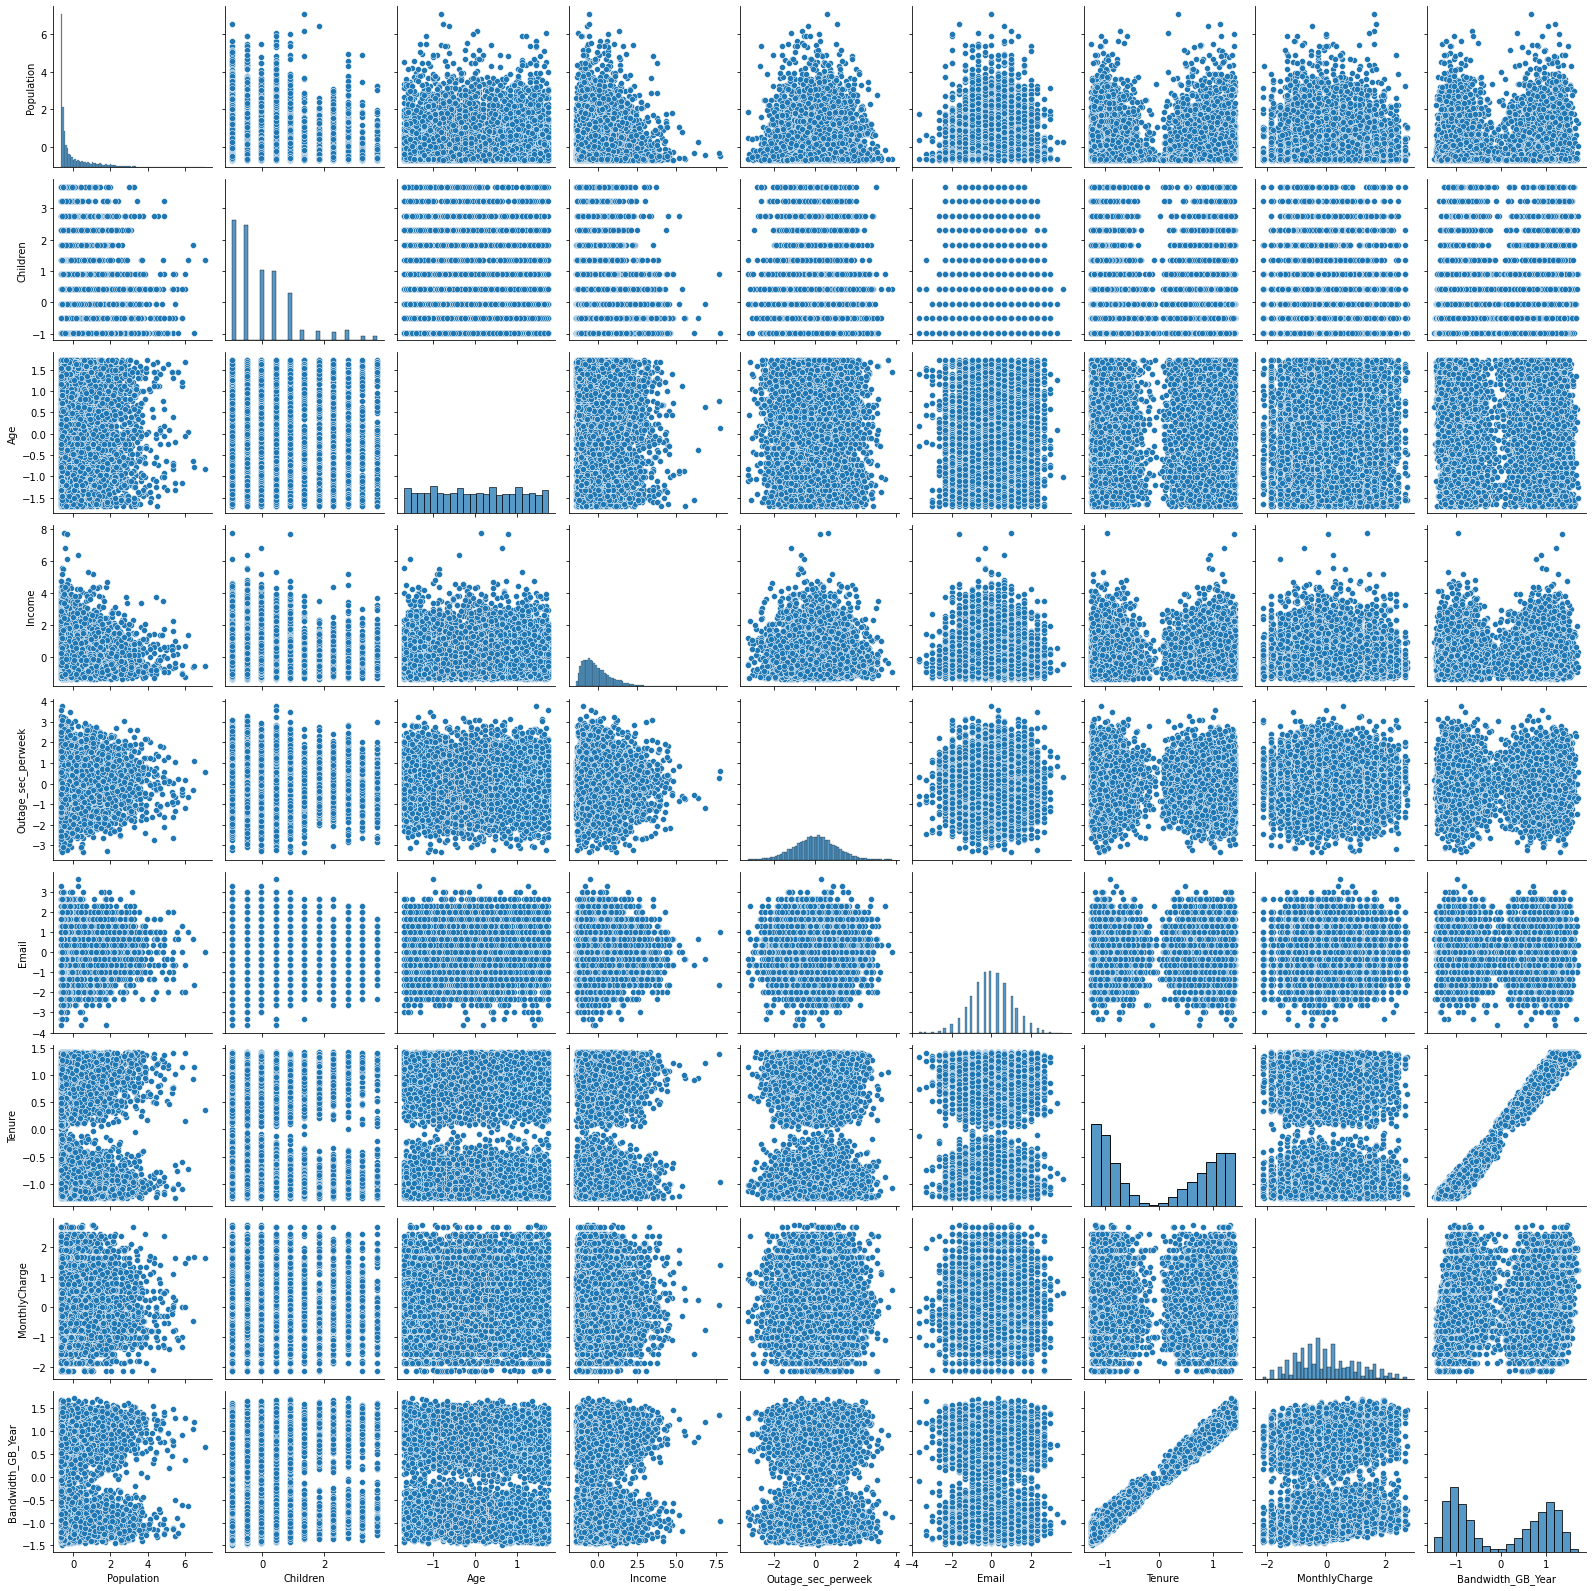

In [291]:
#Compare Plots (Check which would be interesting to use in a k-means test)
sns.pairplot(df_standardized[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']])
#(Waskom, 2021)

In [292]:
#Copy of finalized cleaned dataset
df_tenure_age = df_standardized[['Tenure', 'Age']]
df_tenure_age.to_csv('/Users/Amanda.Hartzler/Desktop/D212_PA_Task1.csv')

# K-Means Clustering 

In [293]:
#Use Elbow Plot to determine number of clusters to use as K
sse = []
k_rng = range(1,10)
for k in k_rng: 
    km = KMeans(n_clusters=k)
    km.fit(df_tenure_age[['Tenure', 'Age']])
    sse.append(km.inertia_)
#(Kamara, 2022)

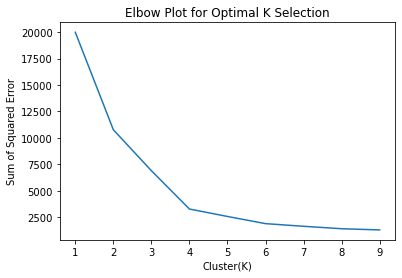

In [294]:
plt.title('Elbow Plot for Optimal K Selection')
plt.xlabel('Cluster(K)')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)
#(Kamara, 2022)

In [295]:
#Using the Elbow Plot, I decided to use 4 clusters 
kmeans = cluster.KMeans(n_clusters=4, init='k-means++')
kmeans = kmeans.fit(df_tenure_age[['Tenure', 'Age']])
#(Kamara, 2022)

In [296]:
#Find the center of each cluster
kmeans.cluster_centers_
#(Kamara, 2022)

array([[-0.96093085,  0.84684009],
       [ 0.96009493,  0.89258875],
       [ 0.96049216, -0.84160114],
       [-0.96042767, -0.88466616]])

In [297]:
#Add cluster labels to the original dataset
df_tenure_age['Clusters'] = kmeans.labels_
#(Kamara, 2022)

In [298]:
df_tenure_age.head()

,Tenure,Age,Clusters
0,-1.048694,0.720889,0
1,-1.261938,-1.259894,3
2,-0.709904,-0.148723,3
3,-0.659491,-0.245347,3
4,-1.242489,1.445566,0


In [299]:
#Find amout of customers in each cluster 
df_tenure_age['Clusters'].value_counts()
#(Kamara, 2022)

2    2519
3    2500
0    2499
1    2482
Name: Clusters, dtype: int64

# Visualize Clusters 

<AxesSubplot:xlabel='Tenure', ylabel='Age'>

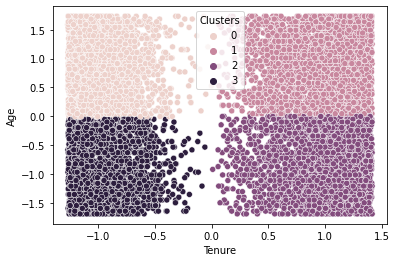

In [300]:
sns.scatterplot(x='Tenure', y='Age', hue='Clusters', data=df_tenure_age)
#(Kamara, 2022)

In [301]:
#Calculate Silhouette Score to Check for Accuracy 
data = df_tenure_age[['Tenure', 'Age']]
score = silhouette_score(data, kmeans.labels_, metric='euclidean')

print('Silhouette Score: %.3f' % score)
#(Kumar, 2021)

Silhouette Score: 0.540
